# Krish Naik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X= 6 * np.random.rand(100,1) -3
y= 0.5 * X**2 + 1.5*X +2 + np.random.randn(100,1)

#Quadratic Eq. -->> y=0.5x^2+1.5x+2+Outliers

Text(0, 0.5, 'Y Dataset')

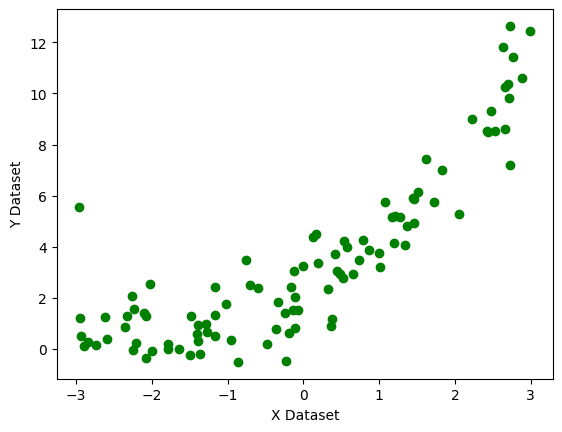

In [3]:
plt.scatter(X,y,color="g")
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
## Simple Linear Reg.

from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [6]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
score

0.7611695569250154

Text(0, 0.5, 'Y ')

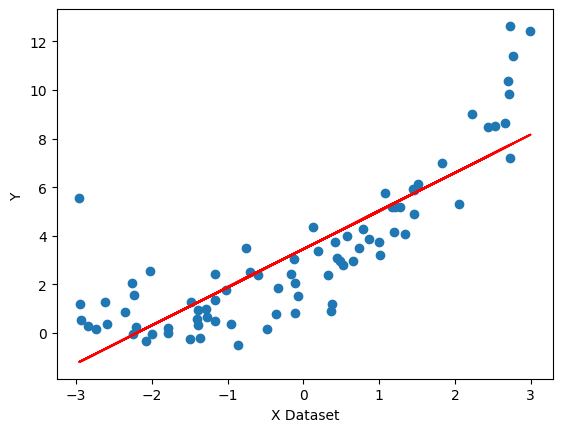

In [9]:
## Lets Visualize this Model 

plt.plot(X_train,regression_1.predict(X_train),"r")
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y ")

High Error !!!

In [10]:
## Lets apply polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [15]:
X_train_poly

array([[ 1.00000000e+00,  4.76785107e-01,  2.27324038e-01],
       [ 1.00000000e+00,  1.45449566e+00,  2.11555763e+00],
       [ 1.00000000e+00, -1.57204972e-01,  2.47134033e-02],
       [ 1.00000000e+00, -1.28485001e+00,  1.65083956e+00],
       [ 1.00000000e+00, -2.02252980e+00,  4.09062680e+00],
       [ 1.00000000e+00, -1.48902751e+00,  2.21720291e+00],
       [ 1.00000000e+00, -1.16375481e+00,  1.35432525e+00],
       [ 1.00000000e+00,  1.21130750e+00,  1.46726585e+00],
       [ 1.00000000e+00,  2.66043271e+00,  7.07790221e+00],
       [ 1.00000000e+00, -1.16715188e+00,  1.36224351e+00],
       [ 1.00000000e+00,  2.99554710e+00,  8.97330245e+00],
       [ 1.00000000e+00,  4.41252767e-01,  1.94704004e-01],
       [ 1.00000000e+00,  2.69782126e+00,  7.27823957e+00],
       [ 1.00000000e+00,  7.31613027e-01,  5.35257621e-01],
       [ 1.00000000e+00,  1.89862379e-01,  3.60477231e-02],
       [ 1.00000000e+00,  1.45482143e+00,  2.11650539e+00],
       [ 1.00000000e+00,  3.83980820e-01

In [14]:
X_test_poly

array([[ 1.00000000e+00,  1.62018182e+00,  2.62498914e+00],
       [ 1.00000000e+00, -1.64270485e+00,  2.69847922e+00],
       [ 1.00000000e+00,  2.47571142e+00,  6.12914705e+00],
       [ 1.00000000e+00, -2.34755037e-01,  5.51099274e-02],
       [ 1.00000000e+00, -1.34013536e-01,  1.79596279e-02],
       [ 1.00000000e+00,  5.42104769e-01,  2.93877580e-01],
       [ 1.00000000e+00, -2.45554302e-01,  6.02969154e-02],
       [ 1.00000000e+00, -2.09900857e+00,  4.40583696e+00],
       [ 1.00000000e+00,  1.36462249e+00,  1.86219454e+00],
       [ 1.00000000e+00,  1.60685757e-01,  2.58199125e-02],
       [ 1.00000000e+00,  1.72321190e+00,  2.96945924e+00],
       [ 1.00000000e+00, -2.89565445e+00,  8.38481469e+00],
       [ 1.00000000e+00,  2.41862304e+00,  5.84973740e+00],
       [ 1.00000000e+00,  2.63305824e+00,  6.93299567e+00],
       [ 1.00000000e+00, -2.07102165e+00,  4.28913069e+00],
       [ 1.00000000e+00,  2.65429653e+00,  7.04529007e+00],
       [ 1.00000000e+00, -3.63555384e-03

In [16]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
score

0.9211755126897708

In [17]:
regression.coef_

array([[0.        , 1.61851298, 0.4770149 ]])

In [18]:
regression.intercept_

array([2.11573279])

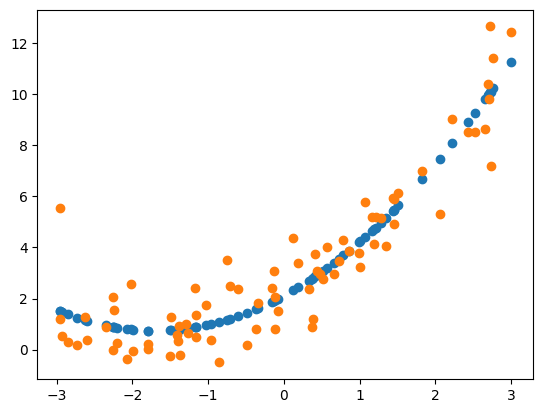

In [20]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [21]:
#Prediction Of new Data
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)

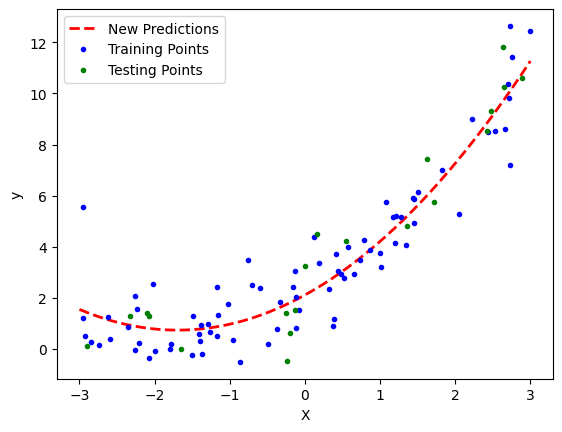

In [23]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r--",linewidth=2,label="New Predictions")
plt.plot(X_train,y_train,"b.",label="Training Points")
plt.plot(X_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

## Pipeline in Polynomial

In [24]:
from sklearn.pipeline import Pipeline

In [26]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear regression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

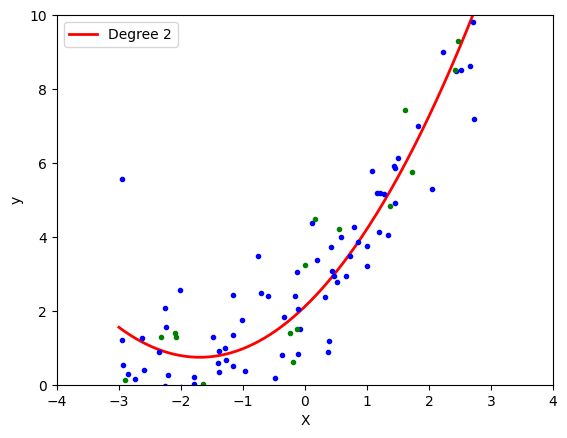

In [28]:
poly_regression(2)

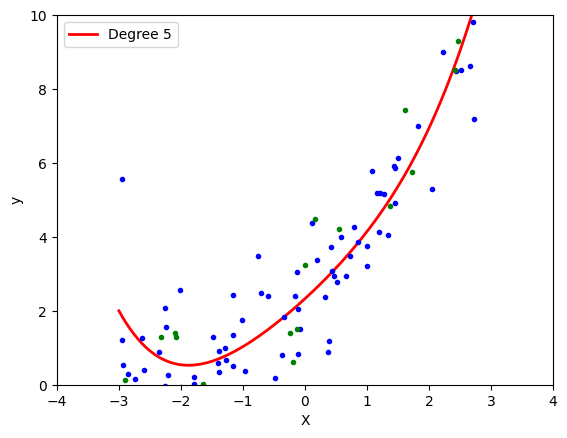

In [27]:
poly_regression(5)

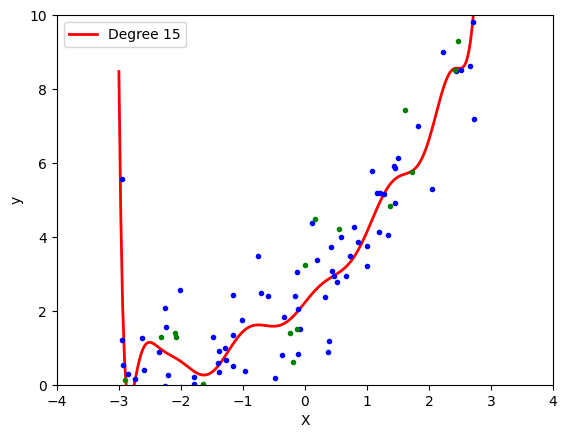

In [30]:
poly_regression(15) ##Overfitting!!!